# Task 12: Hands on Neural Nets

_All credit for the code examples of this notebook goes to the book "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow" by A. Geron. Modifications were made and text was added S. Korn in preparation for the hands-on sessions_

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [6]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Function to save a figure. This also decides that all output files 
# should stored in the subdirectory 'forests'.
PROJECT_ROOT_DIR = "."
EXERCISE = "hands_on_neural_nets"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", EXERCISE)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", EXERCISE, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## The Perceptron
In the lecture you already encountered the concept of the perceptron which is one of the simplest ANN architectures. This artificial neuron is a "threshold logical unit" (TLU) or "linear threshold unit" (LTU).
It computes the weighted sum `z`

$$
z=w\cdot x_1+\dots w_n\cdot x_n = w^T\cdot x
$$

It then uses step functions like the Heaviside function $\mathcal{H}(z)$ or the Signum function $\text{sgn}(z)$

$$
\mathcal{H}(z)= 
  \begin{cases}
                                   0 & \text{if $z<0$} \\
                                   1 & \text{if $z\geq0$}
  \end{cases}
  \quad\quad
  \text{sgn}(z)= 
  \begin{cases}
                                   -1 & \text{if $z<0$} \\
                                   0 & \text{if $z=0$} \\
                                   +1 & \text{if $z>0$}
  \end{cases}
$$

Let's play around with perceptrons a little bit. Scikit-Learn provides a [Perceptron class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). It implements a single TLU network.

We will use two datasets. The `iris dataset` and the `moons dataset`.

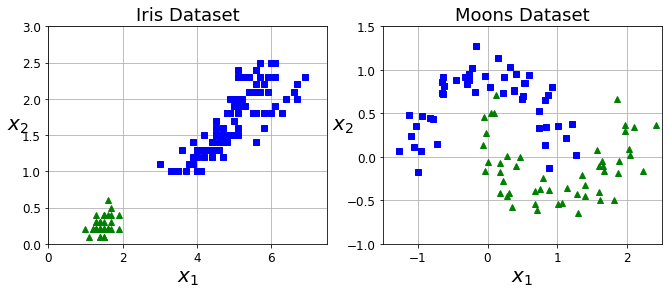

In [7]:
from sklearn.datasets import load_iris # iris dataset
from sklearn.datasets import make_moons # moon dataset

X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

iris = load_iris()
X_iris = iris.data[:, (2, 3)]  # petal length, petal width
y_iris = (iris.target == 0).astype(np.int)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # some blue squares
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") # some green triangles
    plt.axis(axes)
    plt.grid(True, which='both') # to visialize things we add a grid
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Now start the plotting.
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_dataset(X_iris, y_iris, [0, 7.5, 0, 3])
plt.title("Iris Dataset", fontsize=18)
plt.subplot(122)
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Moons Dataset", fontsize=18)
plt.show()

Now we want to train a perceptron model for each of the datasets to classifiy the points within the dataset.

In [8]:
from sklearn.linear_model import Perceptron

per_iris_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_iris_clf.fit(X_iris, y_iris)

per_moons_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_moons_clf.fit(X_moons, y_moons)



Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

You can repeat the training of the model and set some additional parameters. What happens when you set `verbose` to 1?

Saving figure perceptron_iris_moons_plot


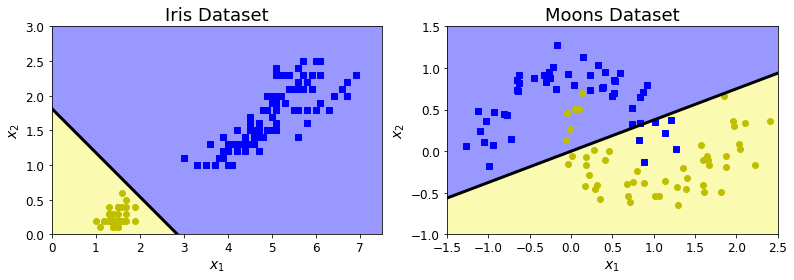

In [9]:
from matplotlib.colors import ListedColormap
axes_iris = [0, 7.5, 0, 3]
axes_moons = [-1.5, 2.5, -1, 1.5]

def get_plot(X, y, axes, clf):
    x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    
    a = -clf.coef_[0][0] / clf.coef_[0][1]
    b = -clf.intercept_ / clf.coef_[0][1]
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = clf.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    plt.plot(X[y==0, 0], X[y==0, 1], "bs")
    plt.plot(X[y==1, 0], X[y==1, 1], "yo")

    plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)
    plt.axis(axes)

plt.figure(figsize=(11, 4))
plt.subplot(121)
get_plot(X_iris, y_iris, axes_iris, per_iris_clf)
plt.title("Iris Dataset", fontsize=18)
plt.subplot(122)
get_plot(X_moons, y_moons, axes_moons, per_moons_clf)
plt.title("Moons Dataset", fontsize=18)

save_fig("perceptron_iris_moons_plot")

Ok. This does not look bad when looking at the iris dataset. But when we look at the other dataset we see, that our classifier performs rather poorly. Why is that?

We try to solve this problem using the [Multi-Layer-Perceptron Class](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) from `Scikit-learn`.

Play around with the parameters a little bit and answer these questions: 

* What happens if you change `learning_rate_init` or the layer structure and the number of nodes?
* What happens when you set `verbose` to 1?
* Which activation function is used by default?  
* Why is this function a good choice? 

The initial parameters are not very well chosen. Can you find better parameters?

In [10]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000, learning_rate_init=0.01)
mlp_clf.fit(X_moons, y_moons)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.01, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

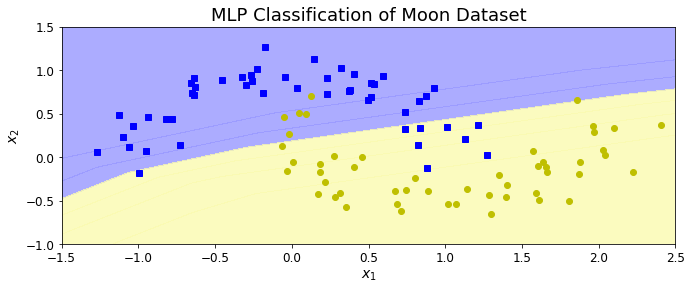

In [11]:
plt.figure(figsize=(11, 4))
axes = axes_moons
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
Z = mlp_clf.predict_proba(np.c_[x0.ravel(), x1.ravel()])[:, 1]
Z = Z.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "bs")
plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "yo")
plt.contourf(x0, x1, Z, cmap=custom_cmap, alpha=.8)
plt.title("MLP Classification of Moon Dataset", fontsize=18)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.show()

## Tensorflow and Keras
You have also learned that we can use Tensorflow and Keras to train (deep) neural networks. Let's try it out.

This time we also want to import [TensorFlow](https://www.tensorflow.org/) and [Keras](https://keras.io/). So let's do that right away!

TensorFlow will serve as our backend and Keras as our high level API that works on top of Tensorflow.

In [12]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow Version: %s"%tf.__version__)
print("Keras Version: %s"%keras.__version__)

TensorFlow Version: 1.13.1
Keras Version: 2.2.4-tf


### Fashion Mnist
[Fashion-MNIST](https://keras.io/api/datasets/fashion_mnist/) is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes. `Fashion-MNIST` is intended to serve as a direct drop-in replacement of the original `MNIST` dataset for benchmarking machine learning algorithms.

In [13]:
# The fashion mnist dataset is accesible via the keras.dataset module
fashion_mnist = keras.datasets.fashion_mnist

# We again split into training and testing
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Let's quickly check the size of the dataset and the used type. We should get 60,000 examples of size 28x28 and they should all be `integers`.

In [14]:
print(X_train_full.shape,X_train_full.dtype)

(60000, 28, 28) uint8


Ok this looks good!
We now want to scale the greyscale values down from the range (0,255) to the range (0,1). We do this by simply dividing our training and testing arrays by 255.
Furthermore, we set 5,000 examples aside for validation purposes.

In [15]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Lets look at a few of these images to get an idea of our dataset.

Saving figure more_clothing_pieces_plot


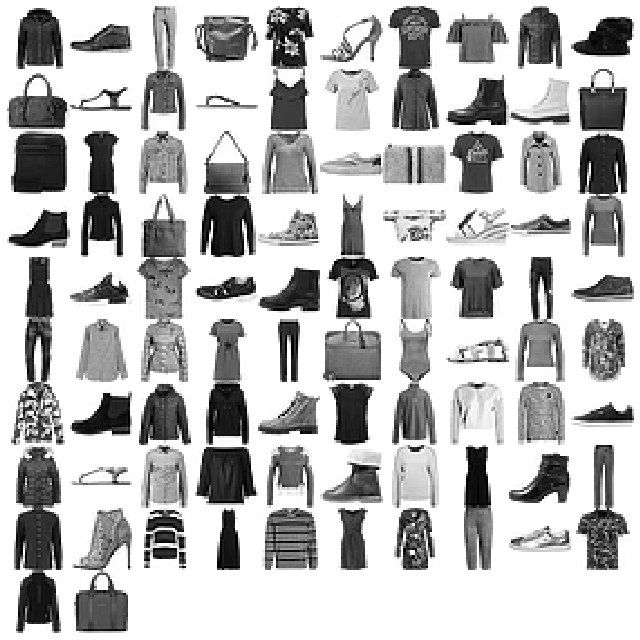

In [16]:
def plot_piece(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
def plot_pieces(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:12000:600], X_train[13000:30600:600], X_train[30600:60000:590]]
plot_pieces(example_images, images_per_row=10)
save_fig("more_clothing_pieces_plot")
plt.show()

In [17]:
# These are the classes of the fashion mnist dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

The distribution of classes is not flat. This means that some pieces of clothing occur more often than others.
We can use the [np.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) function to determine the unique elements of an array.
We apply this function to our training labels and retrieve the number of counts by setting `return_counts=True`.

In [18]:
unique, counts = np.unique(y_train, return_counts=True)
print("Unique labels:", unique)
print("Counts:", counts)

# Now we determine class weights to take this imbalance into account during training.
class_weight = [c/55000 for c in counts]
print("Class Weights:", [round(num, 4) for num in class_weight])

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Counts: [5543 5444 5496 5499 5512 5507 5507 5488 5510 5494]
Class Weights: [0.1008, 0.099, 0.0999, 0.1, 0.1002, 0.1001, 0.1001, 0.0998, 0.1002, 0.0999]


Ok this imbalance does not look to bad. The distribution of classes is almost flat.
Nevertheless, you should always make sure that the classes are balanced during training.

### Building our First Neural Network with Keras

You have already learned a lot about TensorFlow in the lecture. However, you will probably only encounter TensorFlow syntax and functions directly, when you want to customize things. For example when you want very specific layers, gradient calculations, weighting schemes or loss functions.

In practice you will work with Keras 95% of your time and it is likeley that you do not have to dive deeply into Tensorflow itself. That is the magic and power of Keras. It is an API designed for human beings, not machines. Let's dive into it!

Keras models are build starting from the input. For the beginning we will use the [Sequential](https://keras.io/api/models/sequential/) API which provides you with a very intuitive way of building simple neural networks.
For more complex neural networks with several independent inputs, outputs and concatenations Keras provides the [Functional](https://keras.io/guides/functional_api/) API.

The Keras functional API is a way to create models that is more flexible than the Sequential API. The functional API can handle models with non-linear topology, models with shared layers, and models with multiple inputs or outputs.

In [19]:
# We will start with a very simple model
# First we initialise a sequential model
model = keras.models.Sequential()

# Now we can simply add layers to the sequential model
# Here we simply flatten the 28x28 images
model.add(keras.layers.Flatten(input_shape=[28,28]))

# Now we add some hidden layers with 100 and 50 nodes and the relu activation function
model.add(keras.layers.Dense(100, activation=tf.nn.leaky_relu))
model.add(keras.layers.Dense(50, activation=tf.nn.leaky_relu))

#Since we are doing a multi-class classification we apply the softmax activation function
model.add(keras.layers.Dense(10, activation="softmax"))

# At the end we check the summary of our model.
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


To finish the creation of our model we need to compile it.
Here we add
* The loss function 
* The optimiser we want to use
* The metrics that are computed during training

In [20]:
#Since our labels are in the range(0,9) we use the sparse entropy to convert the labels into one-hot-encoded labels
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])

### Fitting the Model

Now we can finally start fitting the model to the training data.
Here we will use
* The training data `X_train`
* The training labels `y_train`
* 30 epochs
* The validation tuple `(X_valid, y_valid)`
* The class weights

In [ ]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid),
                   class_weight=class_weight)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 194us/sample - loss: 0.7581 - acc: 0.7462 - val_loss: 0.5294 - val_acc: 0.8292
Epoch 2/30
55000/55000 [==============================] - 10s 180us/sample - loss: 0.5126 - acc: 0.8225 - val_loss: 0.4752 - val_acc: 0.8380
Epoch 3/30
55000/55000 [==============================] - 9s 169us/sample - loss: 0.4665 - acc: 0.8371 - val_loss: 0.4286 - val_acc: 0.8560
Epoch 4/30
55000/55000 [==============================] - 9s 164us/sample - loss: 0.4400 - acc: 0.8460 - val_loss: 0.4272 - val_acc: 0.8530
Epoch 5/30
55000/55000 [==============================] - 9s 166us/sample - loss: 0.4200 - acc: 0.8529 - val_loss: 0.3975 - val_acc: 0.8662
Epoch 6/30
55000/55000 [==============================] - 10s 177us/sample - loss: 0.4050 - acc: 0.8581 - val_loss: 0.3946 - val_acc: 0.8666
Epoch 7/30
55000/55000 [==============================] - 9s 169us/sample - loss: 0.3913 - acc: 0.8625 - val

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to (0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)